# Assignment #7 (demo). Unsupervised learning

In [33]:
import os
from zipfile import ZipFile 
from pathlib import Path 
import requests

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt

In [36]:
plt.rcParams["figure.figsize"] = (12, 9)
plt.rcParams["font.family"] = "DejaVu Sans"

In [37]:
from sklearn import metrics
from sklearn.cluster import (
    AgglomerativeClustering, KMeans, SpectralClustering,
)
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


In [38]:
RANDOM_STATE = 17

In [39]:
def load_har_dataset(url, extract_path: Path, filename: str, overwrite=False):
    # check if existed already
    filepath = extract_path / filename
    if filepath.exists() and not overwrite:
        print("The dataset is already in place.")
        return

    print("Downloading the dataset from:  ", url)
    response = requests.get(url)

    with open(filepath, 'wb') as f:
        f.write(response.content)

    with ZipFile(filepath, 'r') as zipObj:
        # Extract all the contents of zip file in current directory
        zipObj.extractall(extract_path)

In [41]:
FILE_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
FILE_NAME = "UCI HAR Dataset.zip"
DATA_PATH = Path("../data/")

# load_har_dataset(url=FILE_URL, extract_path=DATA_PATH, filename=FILE_NAME)

PATH_TO_SAMSUNG_DATA = DATA_PATH / FILE_NAME.strip('.zip')

In [42]:
X_train = np.loadtxt(PATH_TO_SAMSUNG_DATA / "train" / "X_train.txt")
y_train = np.loadtxt(PATH_TO_SAMSUNG_DATA / "train" / "y_train.txt").astype(int)

X_test = np.loadtxt(PATH_TO_SAMSUNG_DATA / "test" / "X_test.txt")
y_test = np.loadtxt(PATH_TO_SAMSUNG_DATA / "test" / "y_test.txt").astype(int)

In [43]:
# Checking dimensions
assert X_train.shape == (7352, 561) and y_train.shape == (7352,)
assert X_test.shape == (2947, 561) and y_test.shape == (2947,)

In [44]:
# merging 2 arrays
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [45]:
X.shape, y.shape

((10299, 561), (10299,))

In [46]:
# extracting the number of classes
n_classes = np.unique(y).size
n_classes

6

In [49]:
# scaling the sample using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Question 1:
What is the minimum number of principal components required to cover the 90% of the variance of the original (scaled) data?

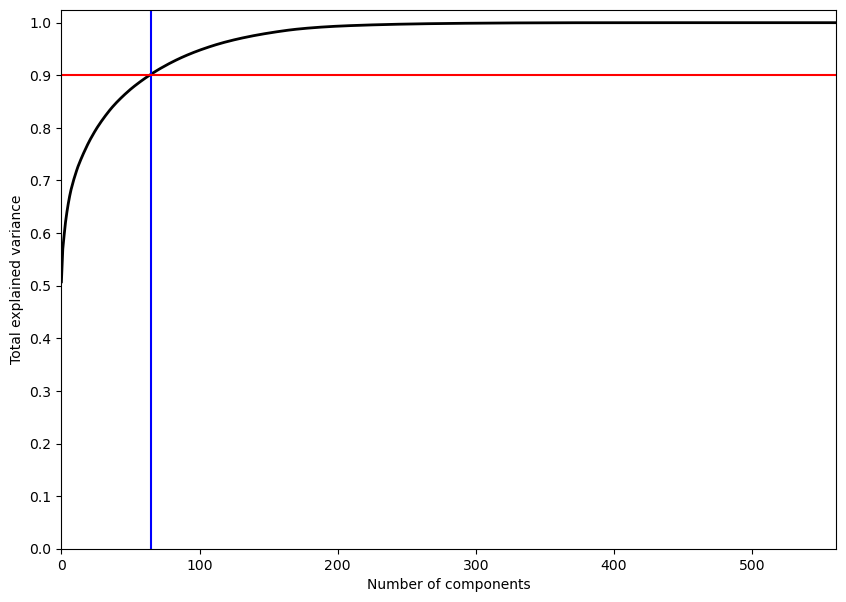

In [65]:
# determining the number of components to leave
n_components = X_scaled.shape[1]
pca = PCA().fit(X_scaled)
optimal_n = 65

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="k", lw=2)
plt.xlabel("Number of components")
plt.ylabel("Total explained variance")
plt.xlim(0, n_components)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(optimal_n, c="b")
plt.axhline(0.9, c="r")
plt.show();

In [76]:
# n_components = 66
pca = PCA(n_components=optimal_n+1).fit(X_scaled)
np.sum(pca.explained_variance_ratio_)

0.9021980433298652

In [77]:
# n_components = 65
pca = PCA(n_components=optimal_n).fit(X_scaled)
np.sum(pca.explained_variance_ratio_)

0.9004833346822928

In [81]:
# reducing the number of dimensions
pca = PCA(n_components=optimal_n, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

In [87]:
X_pca.shape

(10299, 65)

### Question 2:
What percentage of the variance is covered by the first principal component? Round to the nearest percent.

In [84]:
round(pca.explained_variance_ratio_[0] * 100)

51

In [89]:
X_2d

array([[-16.38097982,   1.99508307],
       [-15.58217328,   1.18259368],
       [-15.42398918,   2.24316643],
       ...,
       [ 11.84685312,  -3.43356502],
       [  8.20668637,  -4.38648876],
       [  9.31117251,  -3.98616133]])

### Question 3:
If everything worked out correctly, you will see a number of clusters, almost perfectly separated from each other. What types of activity are included in these clusters?

Answer options:

- 1 cluster: all 6 activities

- 2 clusters: (walking, walking upstairs, walking downstairs ) and (sitting, standing, laying)

- 3 clusters: (walking), (walking upstairs, walking downstairs) and (sitting, standing, laying)

- 6 clusters


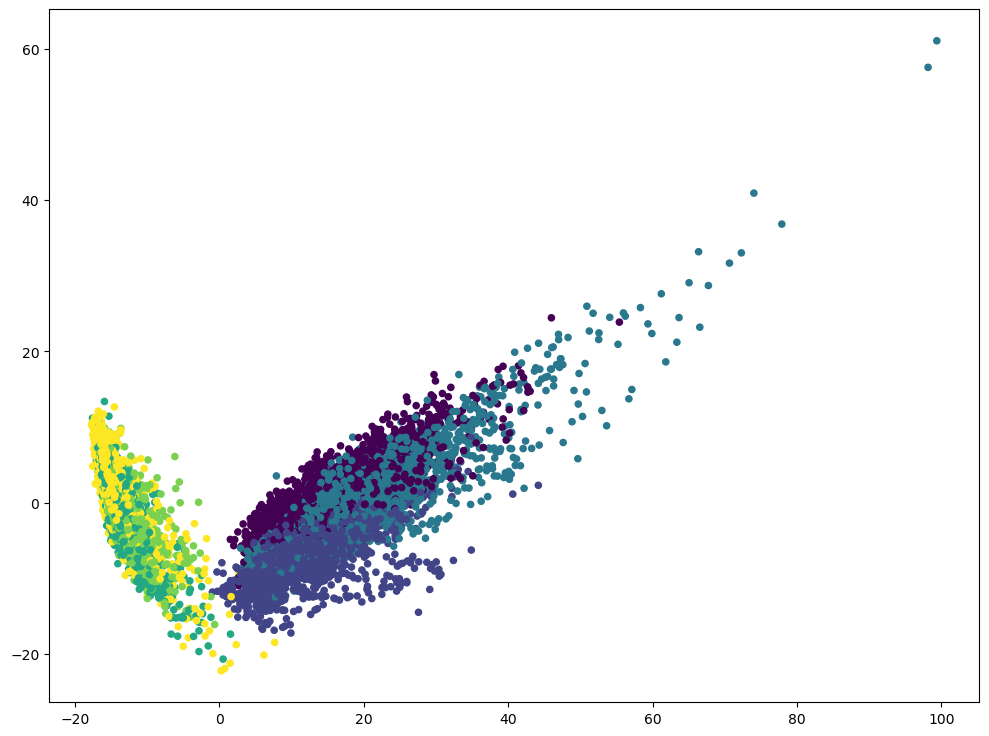

In [90]:
X_2d = PCA(n_components=2, random_state=RANDOM_STATE).fit_transform(X_scaled)
plt.scatter(X_2d[:,0], X_2d[:,1], c=y, s=20, cmap='viridis');